In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

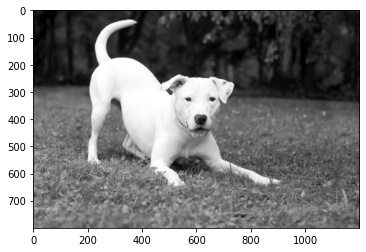

In [4]:
img = cv2.imread('../data/query_dog.png',  0)
plt.imshow(img, cmap="gray")

In [5]:
import pywt
def wavelet_transform(img, family='db3'):
    img = img.astype(np.float32)
    coeffs = pywt.dwt2(img, family)
    LL, (LH, HL, HH) = coeffs
    return LL, LH, HL, HH

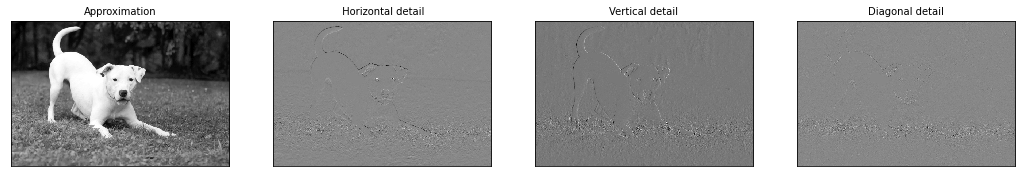

In [9]:
decomposition = wavelet_transform(img, "haar")
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
fig = plt.figure(figsize=(18, 5))
for i, a in enumerate(decomposition):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

In [19]:
def std_coeffs(image, level  = 3):
  coeffs = []
  for i in range(1, level + 1):
    coeff = pywt.wavedec2(image, 'db3', level=i)
    for c in coeff:
      coeffs.append(c)
  return [np.std(c) for c in coeffs]

def mean_coeffs(image, level = 3):
  coeffs = []
  for i in range(1, level + 1):
    coeff = pywt.wavedec2(image, 'db3', level=i)
    for c in coeff:
      coeffs.append(c)
  return [np.mean(c) for c in coeffs]

In [20]:
vector = std_coeffs(img) + mean_coeffs(img)
print(len(vector))

TypeError: downcoef() missing 1 required positional argument: 'wavelet'

In [60]:
from itertools import chain
dd = pywt.wavedec2(img, 'db3', level=3)
coeffs = []
for i in dd:
  if isinstance(i, tuple):
    for j in i:
      coeffs.append(j)
  else:
    coeffs.append(i)
# compute the standard deviation and mean of each coefficient
stds = [np.std(c) for c in coeffs]
means = [np.mean(c) for c in coeffs]
# concatenate the standard deviation and mean of each coefficient
# into a single vector
vector = np.concatenate((stds, means))
print(len(vector))

20


In [8]:
coeff = pywt.wavedec2(img, "haar")
arr, coeff_slices = pywt.coeffs_to_array(coeff)
arr.shape

(502, 338)